In [72]:
df = pd.read_csv('data.csv')

In [73]:
df

,time,host,content,flavor,feed,ent,entname,entno,trades,quotes,backgrounds
0,2021-12-27 13:24:20,host1,content1,flavor1,feed1,ent1,124,124,322,179,68
1,2021-12-27 13:24:20,host1,content1,flavor1,feed1,ent2,346,346,271,795,331
2,2021-12-27 13:24:20,host1,content1,flavor1,feed1,ent9,986,986,586,669,898
3,2021-12-27 13:24:20,host1,content1,flavor1,feed2,ent3,467,467,619,650,704
4,2021-12-27 13:24:20,host1,content1,flavor1,feed2,ent4,789,789,280,659,14
...,...,...,...,...,...,...,...,...,...,...,...
120955,2022-01-03 13:23:20,host2,content1,flavor1,feed3,ent6,234,234,384,581,513
120956,2022-01-03 13:23:20,host2,content1,flavor1,feed3,ent11,111,111,598,207,341
120957,2022-01-03 13:23:20,host2,content1,flavor1,feed4,ent7,890,890,602,869,284
120958,2022-01-03 13:23:20,host2,content1,flavor1,feed4,ent8,232,232,523,495,335


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120960 entries, 0 to 120959
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   time         120960 non-null  object
 1   host         120960 non-null  object
 2   content      120960 non-null  object
 3   flavor       120960 non-null  object
 4   feed         120960 non-null  object
 5   ent          120960 non-null  object
 6   entname      120960 non-null  int64 
 7   entno        120960 non-null  int64 
 8   trades       120960 non-null  int64 
 9   quotes       120960 non-null  int64 
 10  backgrounds  120960 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 10.2+ MB


In [39]:
# convert the column (it's a string) to datetime type
datetime_series = pd.to_datetime(df['time'])

In [40]:
# create datetime index passing the datetime series
datetime_index = pd.DatetimeIndex(datetime_series.values)

In [41]:
df2=df.set_index(datetime_index)

In [42]:
# we don't need the column anymore
df2.drop('time',axis=1,inplace=True)


In [43]:
df2 = df2.resample('H').sum()

In [44]:
df2

,entname,entno,trades,quotes,backgrounds
2021-12-27 13:00:00,190008,190008,210354,220473,207425
2021-12-27 14:00:00,316680,316680,351705,355737,351025
2021-12-27 15:00:00,316680,316680,354444,344601,362027
2021-12-27 16:00:00,316680,316680,352203,364984,376055
2021-12-27 17:00:00,316680,316680,359227,355613,355890
...,...,...,...,...,...
2022-01-03 09:00:00,316680,316680,353071,346929,365604
2022-01-03 10:00:00,316680,316680,359595,354610,366499
2022-01-03 11:00:00,316680,316680,357893,374259,365868
2022-01-03 12:00:00,316680,316680,349229,354893,363000


In [45]:
df_train = df2.iloc[:-10]
df_unseen = df2.tail(10)

In [46]:
df_train

,entname,entno,trades,quotes,backgrounds
2021-12-27 13:00:00,190008,190008,210354,220473,207425
2021-12-27 14:00:00,316680,316680,351705,355737,351025
2021-12-27 15:00:00,316680,316680,354444,344601,362027
2021-12-27 16:00:00,316680,316680,352203,364984,376055
2021-12-27 17:00:00,316680,316680,359227,355613,355890
...,...,...,...,...,...
2022-01-02 23:00:00,316680,316680,349726,360412,341133
2022-01-03 00:00:00,316680,316680,351777,362764,358590
2022-01-03 01:00:00,316680,316680,367357,378391,357092
2022-01-03 02:00:00,316680,316680,369900,362997,359332


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.ensemble import IsolationForest

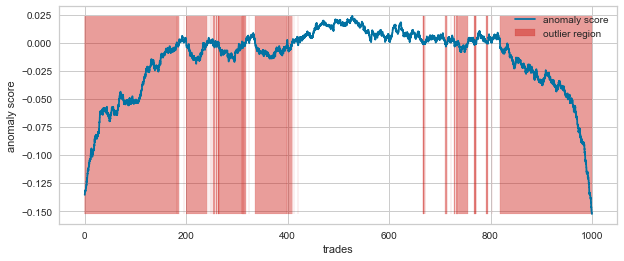

In [65]:
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df['trades'].values.reshape(-1, 1))
xx = np.linspace(df['trades'].min(), df['trades'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('trades')
plt.show();

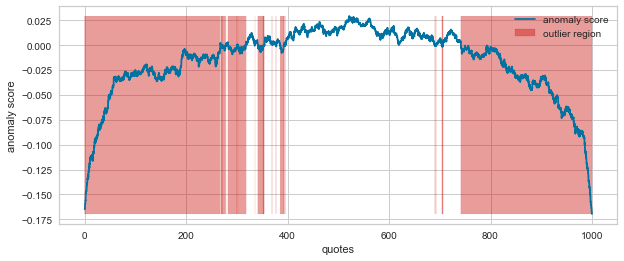

In [66]:
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df['quotes'].values.reshape(-1, 1))
xx = np.linspace(df['quotes'].min(), df['quotes'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('quotes')
plt.show();

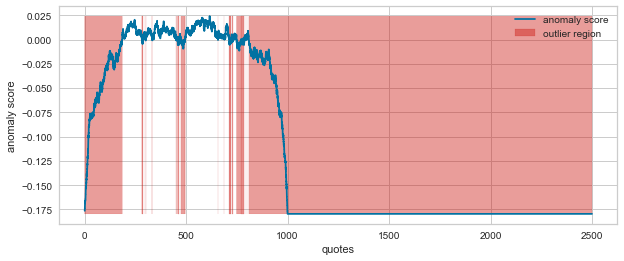

In [74]:
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df['backgrounds'].values.reshape(-1, 1))
xx = np.linspace(df['backgrounds'].min(), df['backgrounds'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('quotes')
plt.show();